In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


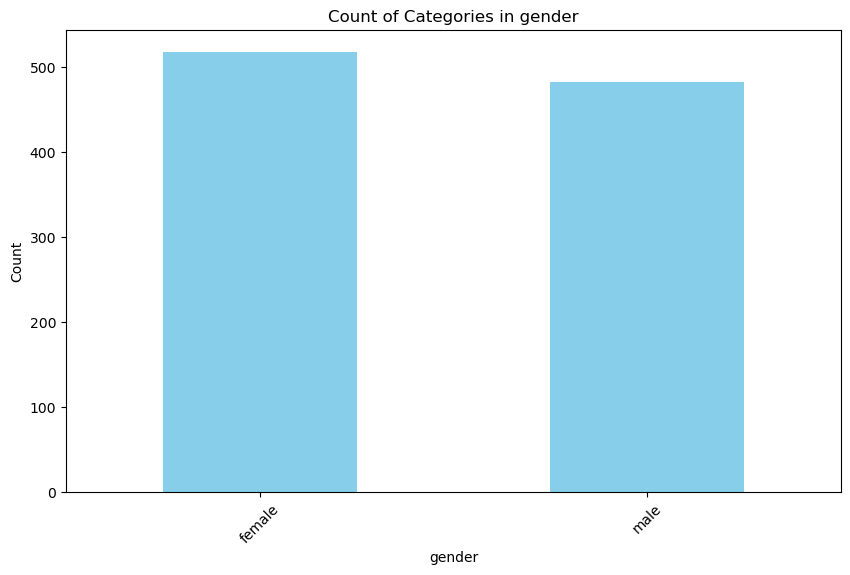

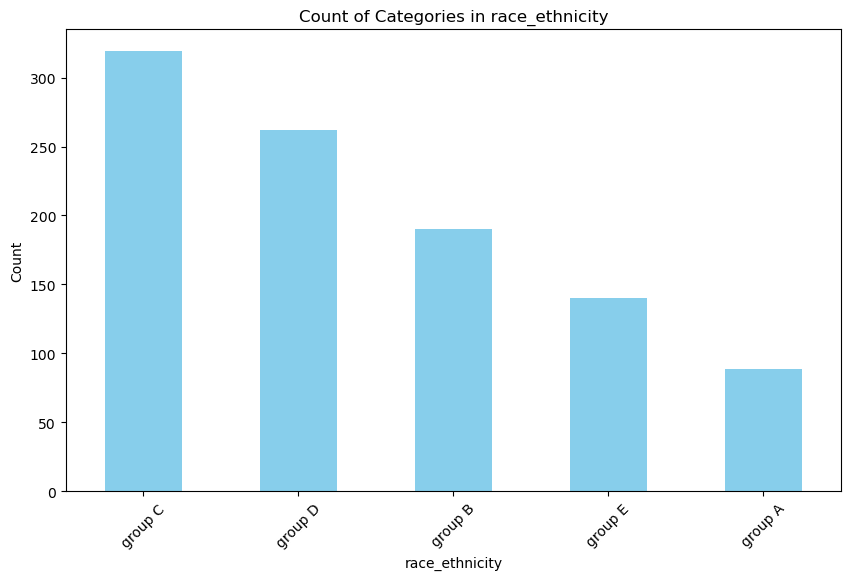

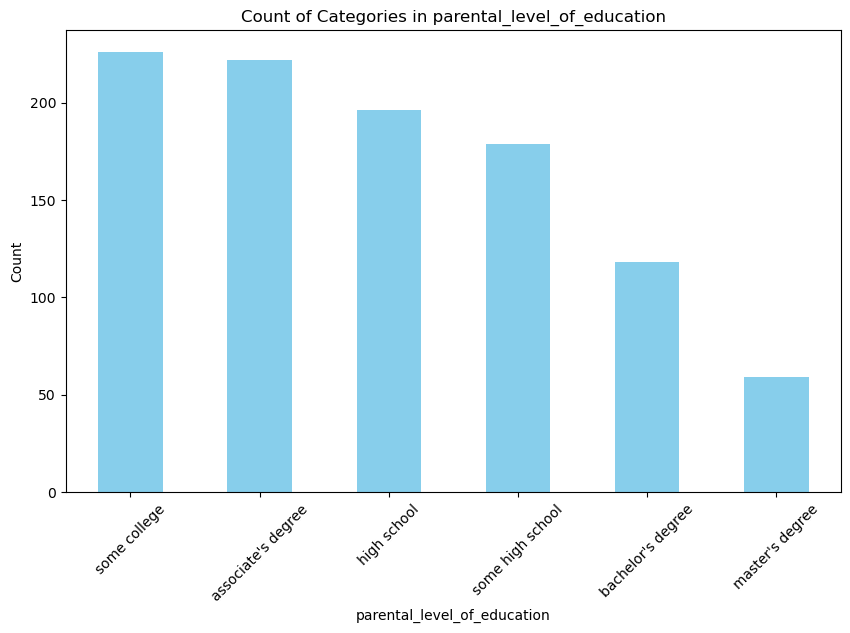

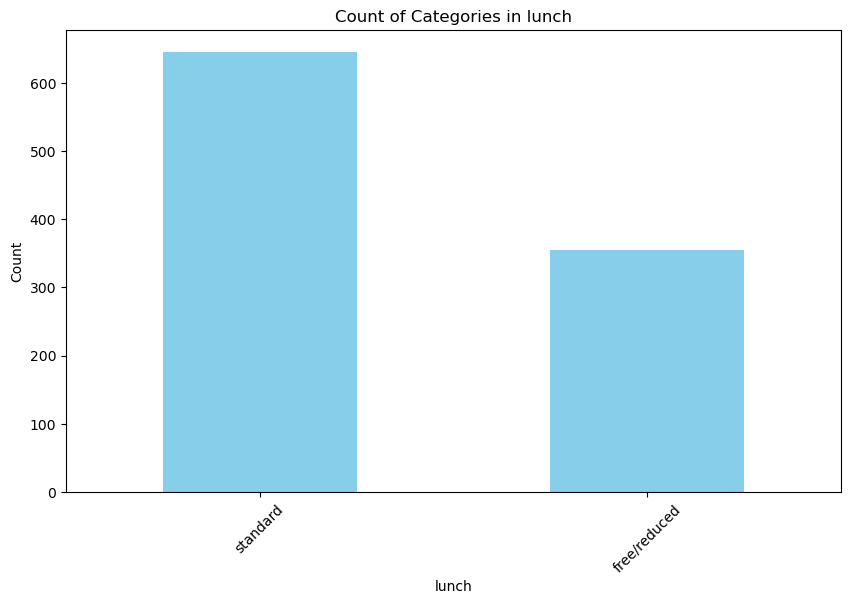

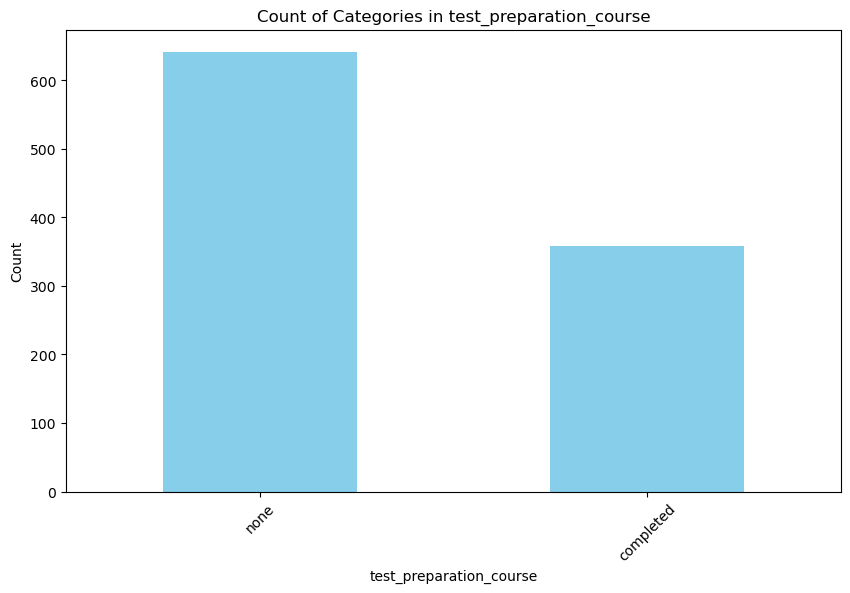

In [11]:
num_vars=['math_score','reading_score','writing_score']
cat_vars=['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
import pandas as pd
import matplotlib.pyplot as plt
cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Count of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Obervations:
- No gender imbalance.
- imbalance  in ethnicity, and lunch categories
- imbalance in none vs completed preparations.


Descriptive Statistics:

What is the mean and standard deviation of the math scores?

What is the median reading score?

What is the interquartile range (IQR) for the writing scores?


Categorical Analysis:

How many students are in each category of parental level of education?

What is the most common lunch type among students?

Correlation Analysis:

What is the correlation coefficient between math and reading scores?

Is there a significant correlation between writing scores and parental level of education?

Comparative Analysis:


Compare the average math scores between students who completed the test preparation course and those who did not.

Is there a significant difference in reading scores between students who have different lunch types (e.g., standard vs. 
free/reduced)?

Inferential Statistics:

Conduct a hypothesis test to determine if the average writing scores are different between male and female students. What is the p-value?

Using ANOVA, test if there are significant differences in math scores among different categories of parental level of education.

Distribution Analysis:

Plot the distribution of math scores. Is it normally distributed?

How does the distribution of reading scores compare to the distribution of writing scores?

In [12]:

column_stats = df.describe()

# Extract mean and std deviation for specific columns
mean_A = column_stats.loc['mean', 'math_score']
std_dev_B = column_stats.loc['std', 'math_score']

print("Descriptive statistics for all columns:")
print(column_stats)

print("\nMean of column A:", mean_A)
print("Standard Deviation of column B:", std_dev_B)


Descriptive statistics for all columns:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Mean of column A: 66.089
Standard Deviation of column B: 15.163080096009468


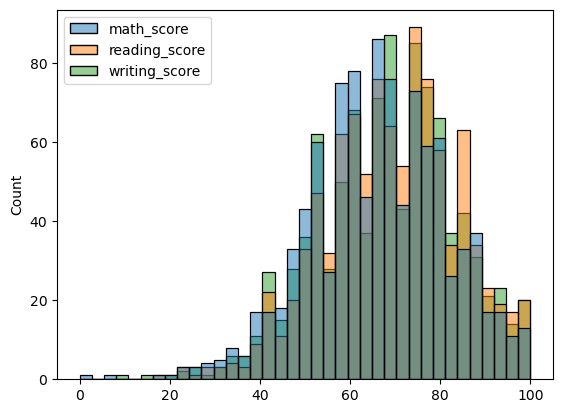

In [13]:
sns.histplot(df)
plt.show()

In [9]:
import pandas as pd
from scipy.stats import shapiro

def perform_shapiro_wilk_test(dataframe):
    normality_results = {}
    
    for column in dataframe.select_dtypes(include=['number']).columns:
        data = dataframe[column].dropna()
        
        if len(data) < 3:
            normality_results[column] = {
                'Statistic': None,
                'p-value': None,
                'Conclusion': "Insufficient data"
            }
            continue
        
        # Perform Shapiro-Wilk test
        statistic, p_value = shapiro(data)
        
        # Determine if data is normally distributed based on p-value
        if p_value > 0.05:
            conclusion = "Data looks normal (fail to reject H0)"
        else:
            conclusion = "Data does not look normal (reject H0)"
        
        # Store results in a dictionary
        normality_results[column] = {
            'Statistic': statistic,
            'p-value': p_value,
            'Conclusion': conclusion
        }
    
    return normality_results

results = perform_shapiro_wilk_test(df)

# Display results
for column, result in results.items():
    print(f"Normality test results for '{column}':")
    print(f"Statistic: {result['Statistic']}")
    print(f"p-value: {result['p-value']}")
    print(f"Conclusion: {result['Conclusion']}")
    print()


Normality test results for 'math_score':
Statistic: 0.9931488633155823
p-value: 0.000144938996527344
Conclusion: Data does not look normal (reject H0)

Normality test results for 'reading_score':
Statistic: 0.9929220676422119
p-value: 0.0001057712797774002
Conclusion: Data does not look normal (reject H0)

Normality test results for 'writing_score':
Statistic: 0.9919640421867371
p-value: 2.9199656637501903e-05
Conclusion: Data does not look normal (reject H0)



Normality test results for 'math_score':
Shapiro-Wilk Test: {'Statistic': 0.9931488633155823, 'p-value': 0.000144938996527344, 'Conclusion': 'Data does not look normal (reject H0)'}
KS Test: {'Statistic': 0.030762879145553867, 'p-value': 0.2942694592802436, 'Conclusion': 'Data looks normal (fail to reject H0)'}



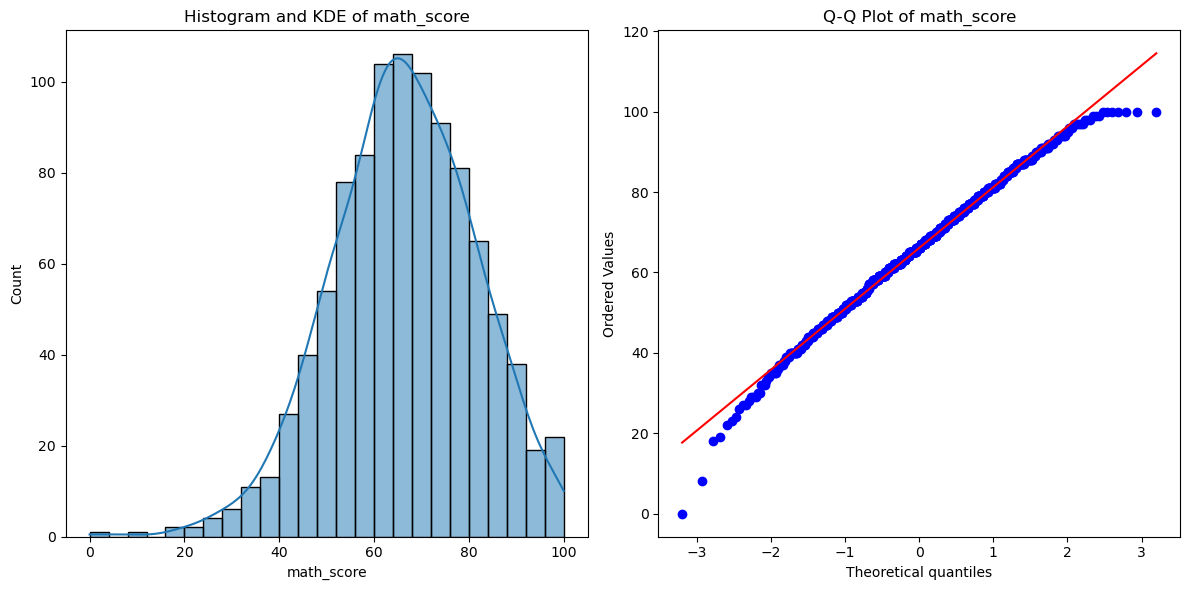

Normality test results for 'reading_score':
Shapiro-Wilk Test: {'Statistic': 0.9929220676422119, 'p-value': 0.0001057712797774002, 'Conclusion': 'Data does not look normal (reject H0)'}
KS Test: {'Statistic': 0.04391150469189853, 'p-value': 0.041032676974346094, 'Conclusion': 'Data does not look normal (reject H0)'}



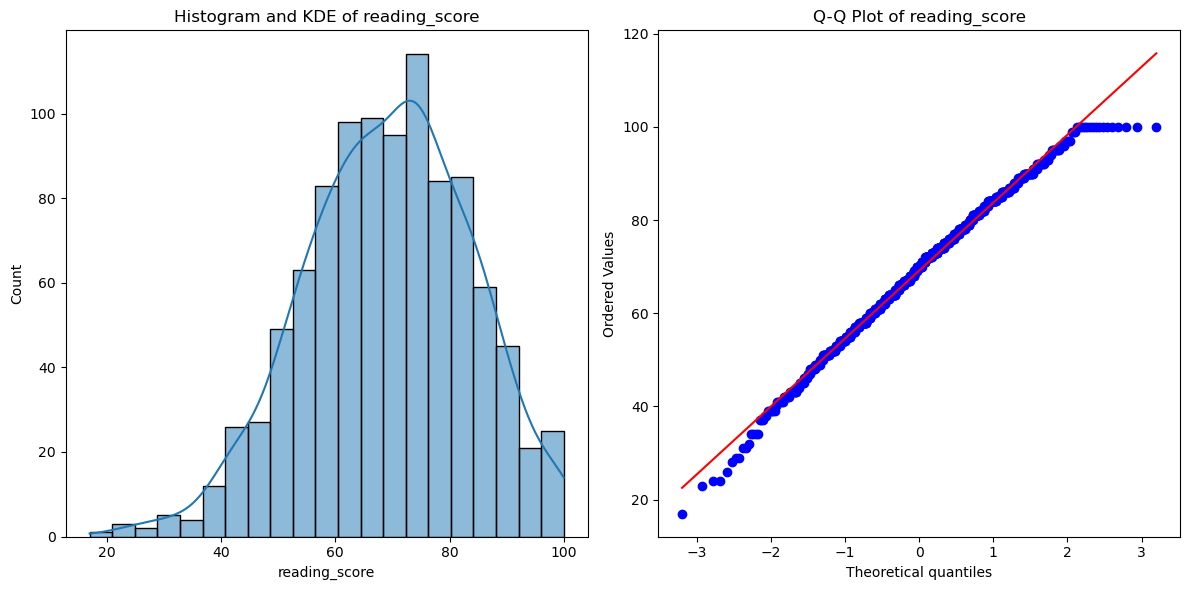

Normality test results for 'writing_score':
Shapiro-Wilk Test: {'Statistic': 0.9919640421867371, 'p-value': 2.9199656637501903e-05, 'Conclusion': 'Data does not look normal (reject H0)'}
KS Test: {'Statistic': 0.041581593593281896, 'p-value': 0.06122299309696777, 'Conclusion': 'Data looks normal (fail to reject H0)'}



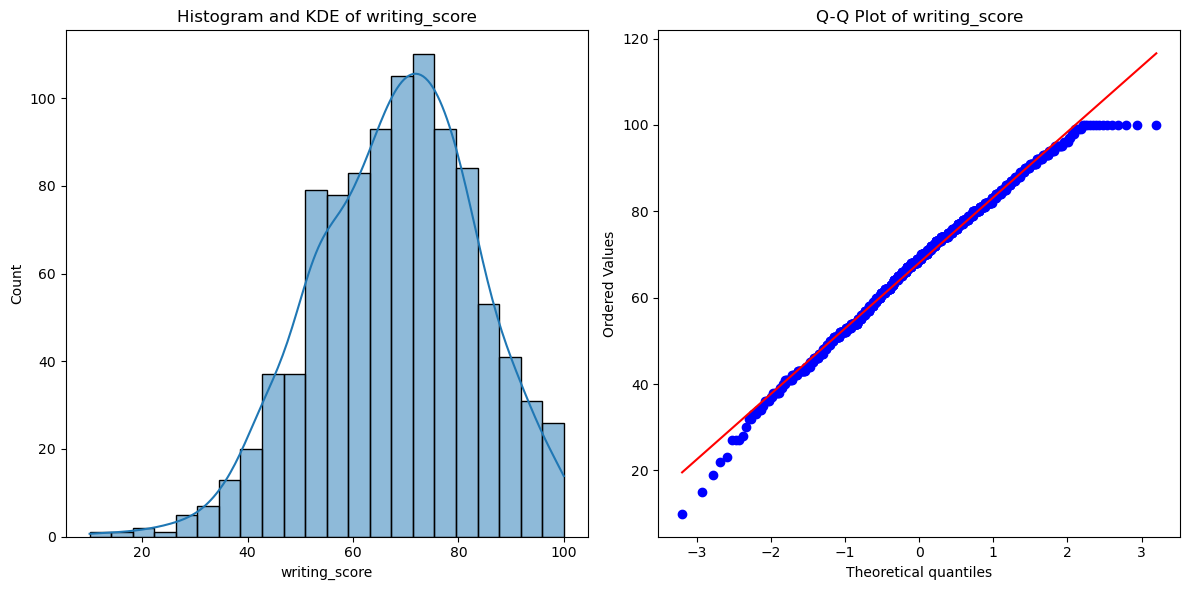

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def perform_normality_tests(dataframe):
    normality_results = {}
    
    for column in dataframe.select_dtypes(include=['number']).columns:
        data = dataframe[column].dropna()
        
        if len(data) < 5:
            normality_results[column] = {
                'Shapiro-Wilk Test': None,
                'KS Test': None,
                'Conclusion': "Insufficient data"
            }
            continue
        
        # Perform Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(data)
        
        # Perform Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
        
        # Determine conclusions
        shapiro_conclusion = "Data does not look normal (reject H0)" if shapiro_p < 0.05 else "Data looks normal (fail to reject H0)"
        ks_conclusion = "Data does not look normal (reject H0)" if ks_p < 0.05 else "Data looks normal (fail to reject H0)"
        
        normality_results[column] = {
            'Shapiro-Wilk Test': {
                'Statistic': shapiro_stat,
                'p-value': shapiro_p,
                'Conclusion': shapiro_conclusion
            },
            'KS Test': {
                'Statistic': ks_stat,
                'p-value': ks_p,
                'Conclusion': ks_conclusion
            }
        }
    
    return normality_results

def plot_distribution(dataframe, column):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[column].dropna(), kde=True)
    plt.title(f'Histogram and KDE of {column}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(dataframe[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    
    plt.tight_layout()
    plt.show()


# Perform normality tests
results = perform_normality_tests(df)

# Display results
for column, result in results.items():
    print(f"Normality test results for '{column}':")
    print(f"Shapiro-Wilk Test: {result['Shapiro-Wilk Test']}")
    print(f"KS Test: {result['KS Test']}")
    print()
    
    # Plot distribution
    plot_distribution(df, column)


In [14]:
pip install matplotlib seaborn scipy statsmodels


Note: you may need to restart the kernel to use updated packages.


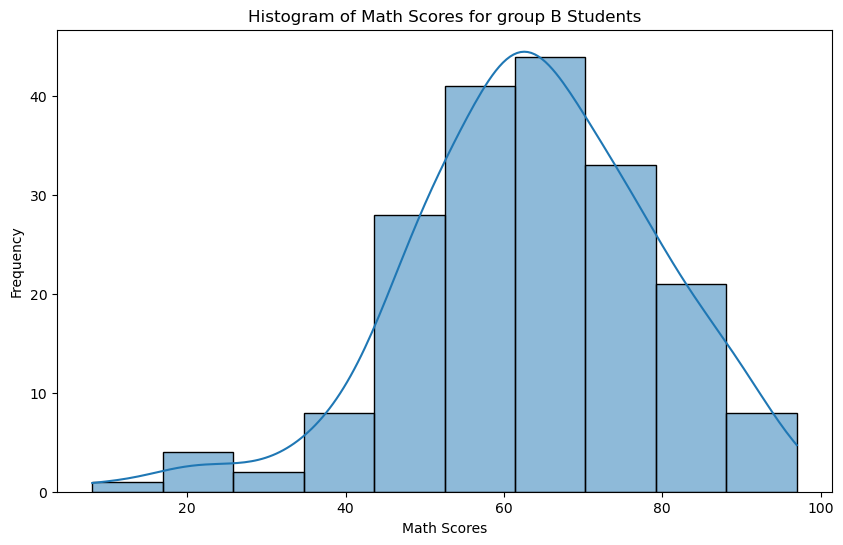

<Figure size 1000x600 with 0 Axes>

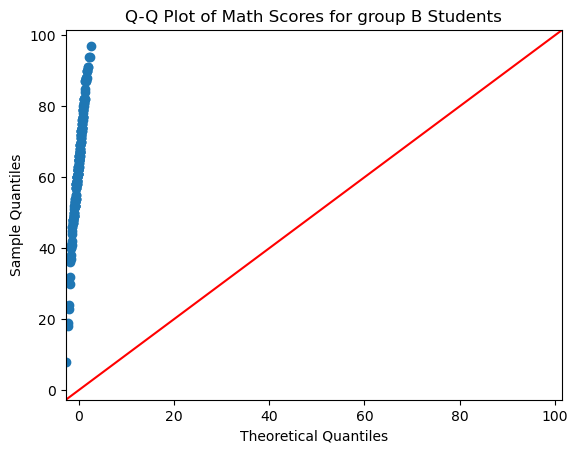

Anderson-Darling Test Results for group B Students
Anderson-Darling Test Statistic: 0.546
At the 15.0% level, the null hypothesis of normality cannot be rejected (statistic=0.546, critical value=0.565).
At the 10.0% level, the null hypothesis of normality cannot be rejected (statistic=0.546, critical value=0.643).
At the 5.0% level, the null hypothesis of normality cannot be rejected (statistic=0.546, critical value=0.771).
At the 2.5% level, the null hypothesis of normality cannot be rejected (statistic=0.546, critical value=0.900).
At the 1.0% level, the null hypothesis of normality cannot be rejected (statistic=0.546, critical value=1.070).




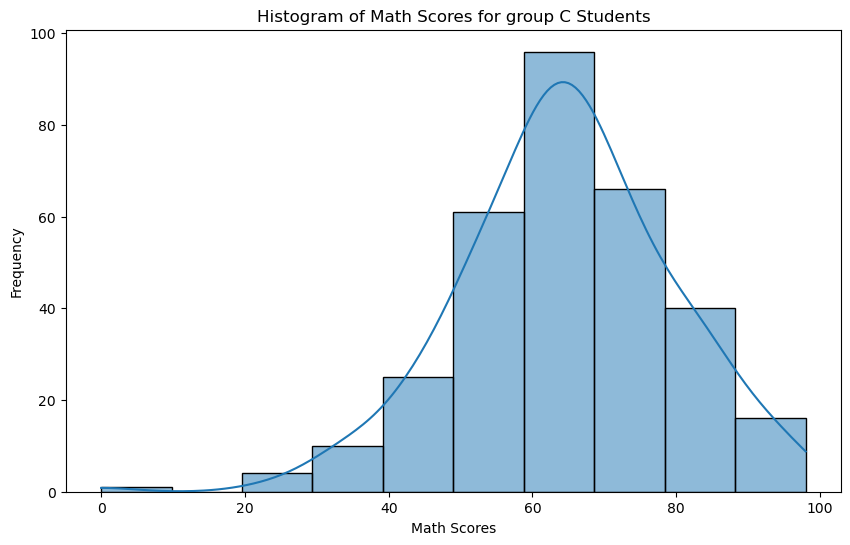

<Figure size 1000x600 with 0 Axes>

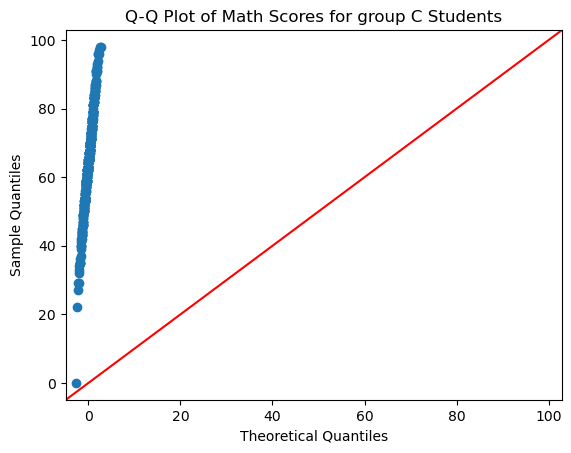

Anderson-Darling Test Results for group C Students
Anderson-Darling Test Statistic: 0.481
At the 15.0% level, the null hypothesis of normality cannot be rejected (statistic=0.481, critical value=0.569).
At the 10.0% level, the null hypothesis of normality cannot be rejected (statistic=0.481, critical value=0.648).
At the 5.0% level, the null hypothesis of normality cannot be rejected (statistic=0.481, critical value=0.777).
At the 2.5% level, the null hypothesis of normality cannot be rejected (statistic=0.481, critical value=0.907).
At the 1.0% level, the null hypothesis of normality cannot be rejected (statistic=0.481, critical value=1.079).




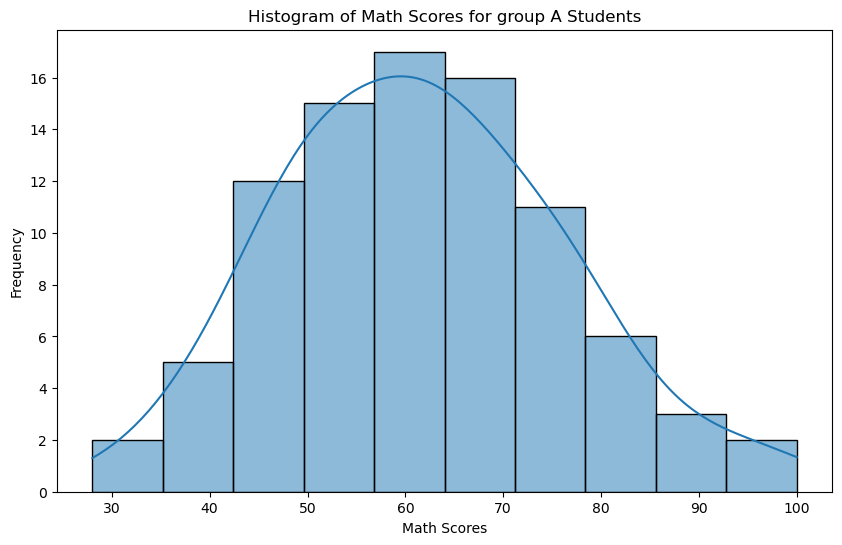

<Figure size 1000x600 with 0 Axes>

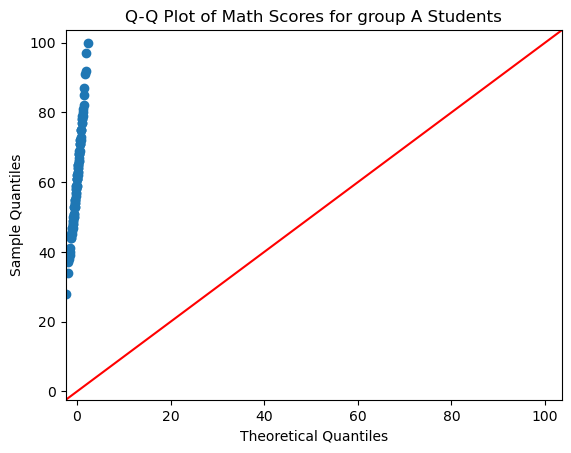

Anderson-Darling Test Results for group A Students
Anderson-Darling Test Statistic: 0.199
At the 15.0% level, the null hypothesis of normality cannot be rejected (statistic=0.199, critical value=0.553).
At the 10.0% level, the null hypothesis of normality cannot be rejected (statistic=0.199, critical value=0.630).
At the 5.0% level, the null hypothesis of normality cannot be rejected (statistic=0.199, critical value=0.755).
At the 2.5% level, the null hypothesis of normality cannot be rejected (statistic=0.199, critical value=0.881).
At the 1.0% level, the null hypothesis of normality cannot be rejected (statistic=0.199, critical value=1.048).




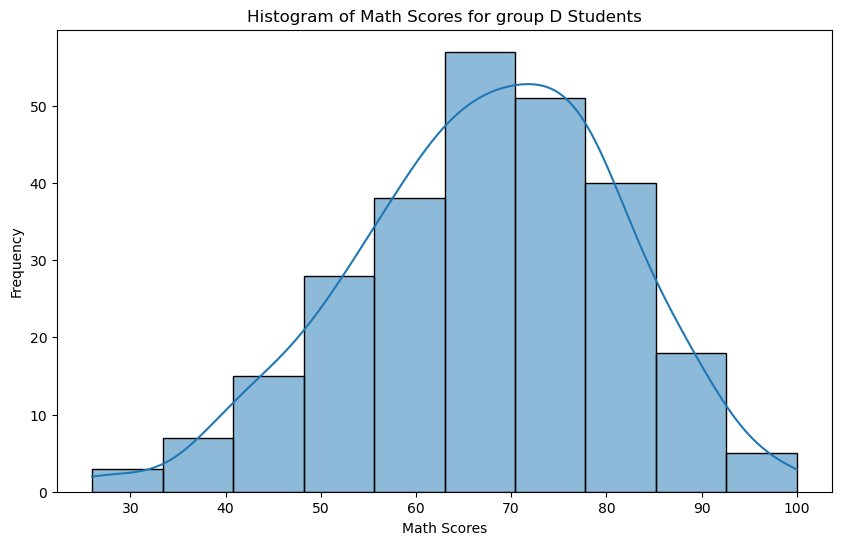

<Figure size 1000x600 with 0 Axes>

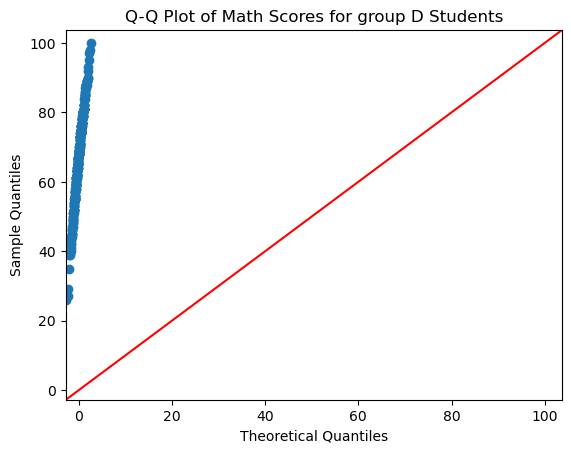

Anderson-Darling Test Results for group D Students
Anderson-Darling Test Statistic: 0.701
At the 15.0% level, the null hypothesis of normality can be rejected (statistic=0.701, critical value=0.568).
At the 10.0% level, the null hypothesis of normality can be rejected (statistic=0.701, critical value=0.646).
At the 5.0% level, the null hypothesis of normality cannot be rejected (statistic=0.701, critical value=0.775).
At the 2.5% level, the null hypothesis of normality cannot be rejected (statistic=0.701, critical value=0.905).
At the 1.0% level, the null hypothesis of normality cannot be rejected (statistic=0.701, critical value=1.076).




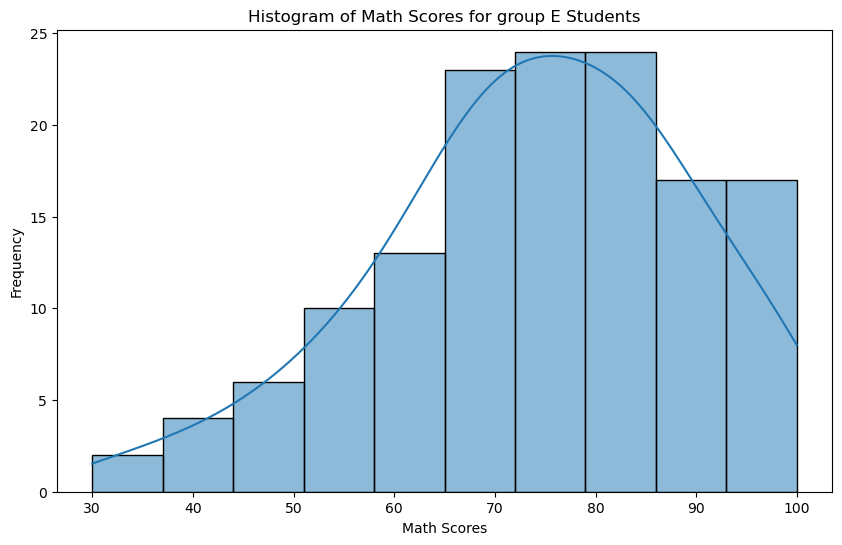

<Figure size 1000x600 with 0 Axes>

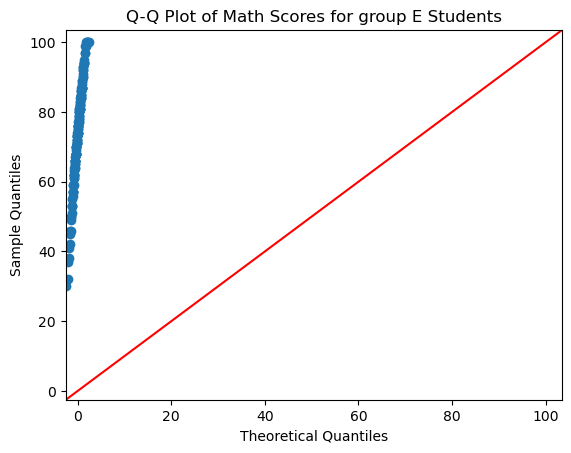

Anderson-Darling Test Results for group E Students
Anderson-Darling Test Statistic: 0.553
At the 15.0% level, the null hypothesis of normality cannot be rejected (statistic=0.553, critical value=0.561).
At the 10.0% level, the null hypothesis of normality cannot be rejected (statistic=0.553, critical value=0.639).
At the 5.0% level, the null hypothesis of normality cannot be rejected (statistic=0.553, critical value=0.766).
At the 2.5% level, the null hypothesis of normality cannot be rejected (statistic=0.553, critical value=0.894).
At the 1.0% level, the null hypothesis of normality cannot be rejected (statistic=0.553, critical value=1.063).




In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import anderson
import statsmodels.api as sm


# Getting the unique groups
groups = df['race_ethnicity'].unique()

# Iterating through each group to perform the analysis
for group in groups:
    group_scores = df[df['race_ethnicity'] == group]['math_score']
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(group_scores, bins=10, kde=True)
    plt.title(f'Histogram of Math Scores for {group} Students')
    plt.xlabel('Math Scores')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting the Q-Q plot
    plt.figure(figsize=(10, 6))
    sm.qqplot(np.array(group_scores), line='45')
    plt.title(f'Q-Q Plot of Math Scores for {group} Students')
    plt.show()
    
    # Performing the Anderson-Darling normality test
    result = anderson(group_scores)
    print(f'Anderson-Darling Test Results for {group} Students')
    print('Anderson-Darling Test Statistic: %.3f' % result.statistic)
    
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('At the %.1f%% level, the null hypothesis of normality cannot be rejected (statistic=%.3f, critical value=%.3f).' % (sl, result.statistic, cv))
        else:
            print('At the %.1f%% level, the null hypothesis of normality can be rejected (statistic=%.3f, critical value=%.3f).' % (sl, result.statistic, cv))
    print('\n')


In [23]:
from scipy.stats import ttest_ind

# Get the math scores for Group A
group_a_scores = df[df['race_ethnicity'] == 'group A']['math_score']

# List to store the results
results = []

# Iterate over each group and perform the t-test against Group A
for group in groups:
    if group != 'group A':  # Skip comparison with itself
        # Get the math scores for the current group
        current_group_scores = df[df['race_ethnicity'] == group]['math_score']
        
        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(group_a_scores, current_group_scores, equal_var=False)
        
        # Store the results
        results.append((group, t_statistic, p_value))

# Print the results
for result in results:
    group, t_statistic, p_value = result
    print(f"Comparison between Group A and {group}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: There is a significant difference in math scores.")
    else:
        print("Result: There is no significant difference in math scores.")
    print("\n")


Comparison between Group A and group B:
T-statistic: -0.9571581345265558
P-value: 0.3397544306331377
Result: There is no significant difference in math scores.


Comparison between Group A and group C:
T-statistic: -1.620139293831471
P-value: 0.1073983041618127
Result: There is no significant difference in math scores.


Comparison between Group A and group D:
T-statistic: -3.25975537990377
P-value: 0.0013888043885143672
Result: There is a significant difference in math scores.


Comparison between Group A and group E:
T-statistic: -6.026063624200208
P-value: 8.143027574026141e-09
Result: There is a significant difference in math scores.




In [22]:
from scipy.stats import ttest_ind

# Get the math scores for Group A
group_a_scores = df[df['race_ethnicity'] == 'group A']['reading_score']

# List to store the results
results = []

# Iterate over each group and perform the t-test against Group A
for group in groups:
    if group != 'group A':  # Skip comparison with itself
        # Get the math scores for the current group
        current_group_scores = df[df['race_ethnicity'] == group]['math_score']
        
        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(group_a_scores, current_group_scores, equal_var=False)
        
        # Store the results
        results.append((group, t_statistic, p_value))

# Print the results
for result in results:
    group, t_statistic, p_value = result
    print(f"Comparison between Group A and {group}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: There is a significant difference in reading scores.")
    else:
        print("Result: There is no significant difference in reading scores.")
    print("\n")


Comparison between Group A and group B:
T-statistic: 0.6127582083671426
P-value: 0.5408483557468899
Result: There is no significant difference in reading scores.


Comparison between Group A and group C:
T-statistic: 0.1138964672433631
P-value: 0.9094877096815301
Result: There is no significant difference in reading scores.


Comparison between Group A and group D:
T-statistic: -1.4498561493684379
P-value: 0.14936973411182075
Result: There is no significant difference in reading scores.


Comparison between Group A and group E:
T-statistic: -4.341900711879405
P-value: 2.3093080751381653e-05
Result: There is a significant difference in reading scores.




In [21]:
from scipy.stats import ttest_ind

# Get the math scores for Group A
group_a_scores = df[df['race_ethnicity'] == 'group A']['writing_score']

# List to store the results
results = []

# Iterate over each group and perform the t-test against Group A
for group in groups:
    if group != 'group A':  # Skip comparison with itself
        # Get the math scores for the current group
        current_group_scores = df[df['race_ethnicity'] == group]['math_score']
        
        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(group_a_scores, current_group_scores, equal_var=False) 
        
        # Store the results
        results.append((group, t_statistic, p_value))

# Print the results
for result in results:
    group, t_statistic, p_value = result
    print(f"Comparison between Group A and {group}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: There is a significant difference in writing scores.")
    else:
        print("Result: There is no significant difference in writing scores.")
    print("\n")


Comparison between Group A and group B:
T-statistic: -0.3918075308071124
P-value: 0.6956849875312743
Result: There is no significant difference in writing scores.


Comparison between Group A and group C:
T-statistic: -0.9735272185664935
P-value: 0.33201219753062805
Result: There is no significant difference in writing scores.


Comparison between Group A and group D:
T-statistic: -2.5381691175986085
P-value: 0.012250819639646623
Result: There is a significant difference in writing scores.


Comparison between Group A and group E:
T-statistic: -5.306981457948957
P-value: 3.1170765818601585e-07
Result: There is a significant difference in writing scores.




In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform one-way ANOVA
model = ols('writing_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)   15623.225898    5.0  14.442416  1.120280e-13
Residual                        215053.858102  994.0        NaN           NaN


significant difference of writing scores across different parental levels of education. 

In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform one-way ANOVA
model = ols('reading_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                       sum_sq     df       F        PR(>F)
C(parental_level_of_education)    9506.493193    5.0  9.2894  1.168246e-08
Residual                        203445.945807  994.0     NaN           NaN


In [27]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform one-way ANOVA
model = ols('math_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                       sum_sq     df         F    PR(>F)
C(parental_level_of_education)    7295.561831    5.0  6.521583  0.000006
Residual                        222393.517169  994.0       NaN       NaN
